# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies

import random
from citipy import citipy

    #API
import requests  #enable making web requests to access and use RESTful API endpoints 
from config import (weather_api_key, g_key)  #Open weather and Google Maps and Places API keys
import json

    #Data manipulation
import numpy as np  #provides fast mathematical computation on arrays and matrices
import pandas as pd  #open source library provides high-performance, easy-to-use data structures and data analysis tools.

    #Data visualisation   
import gmaps  #Embed google maps
from scipy.stats import linregress  #collection of mathematical algorithms and convenience functions - adds significant power to the interactive Python session - manipulating and visualizing data.
from matplotlib import pyplot as plt  #Plotting library
#For linear regression
import scipy.stats as st

#gmaps.configure(api_key=g_key)

## Generate Cities List

In [3]:
#create a latitude range of 600 items  - random numbers from -90 to +90 - need 2 decimal places
#create a longitude range of 600 items - random numbers from -180 to 180 - need 2 decimal places
    #https://pynative.com/python-get-random-float-numbers/

LatList = []
LongList = []
for lat in range(0,1500):
    LatList.append(round(random.uniform(-90, 90), 2))   
    LongList.append(round(random.uniform(-180, 180), 2))


#lat = np.random.uniform(low=-90.000, high=90.000, 600)
#Long = np.random.uniform(low=-180.000, high=180.000, 600)


#Test data
#print(LatList, LongList)
#print(LatList[0], LongList[0])
#print(len(LatList), len(LongList))


In [4]:
#Coords = zip(LatList, LongList)
#Coords


In [5]:
#I think in need to do a dataframe with the two lists
coords = pd.DataFrame(list(zip(LatList, LongList)), 
              columns =['Latitiude', 'Longitude'])
coords.head(2)

,Latitiude,Longitude
0,38.11,45.94
1,-62.76,139.86


In [6]:
#Test Data
#city1 = citipy.nearest_city (50.58, -162.63)
#print(city1.city_name)

#city2 = citipy.nearest_city (40.46, 72.85)
#print(city2.city_name)

In [7]:
#Test Data
#citytest = citipy.nearest_city (LatList[0], LongList[0])
#print(citytest.city_name)

#citytest2 = citipy.nearest_city (LatList[1], LongList[1])
#print(citytest2.city_name)

In [8]:
#Test Data
#cityzip = citipy.nearest_city(coords["Latitiude"][0], coords["Longitude"][0])
#print(cityzip.city_name)

#cityzip2 = citipy.nearest_city(coords["Latitiude"][1], coords["Longitude"][1])
#print(cityzip2.city_name)

In [9]:
#Create a new City column in coords

coords['City'] = "" 

coords.head(2)

,Latitiude,Longitude,City
0,38.11,45.94,
1,-62.76,139.86,


In [10]:
#create an empty city list
cities = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

for x in range(0,len(coords)):
    #print(coords["Latitiude"][x], coords["Longitude"][x])
    cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
    cityname = cityget.city_name
    
    cities.append(cityname)
    
coords['City'] = cities
coords

,Latitiude,Longitude,City
0,38.11,45.94,azar shahr
1,-62.76,139.86,hobart
2,-74.39,112.17,albany
3,63.02,-55.60,maniitsoq
4,0.82,108.52,sungairaya
...,...,...,...
1495,10.90,30.00,kaduqli
1496,68.75,-0.61,brae
1497,-9.21,50.98,ambilobe
1498,77.64,-34.36,tasiilaq


In [11]:
#removed duplicates
# Getting the duplicate cities
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
coordsduplicates = coords[coords.duplicated(['City'])]
coordsduplicates

,Latitiude,Longitude,City
12,-84.31,54.05,port alfred
15,-65.96,41.45,port alfred
23,84.65,-123.94,tuktoyaktuk
33,-88.93,-60.81,ushuaia
37,-85.00,-148.48,mataura
...,...,...,...
1493,79.68,-122.30,tuktoyaktuk
1494,-84.59,177.77,kaitangata
1497,-9.21,50.98,ambilobe
1498,77.64,-34.36,tasiilaq


In [12]:
# First create a list of the indexes that are duplicates
duplicateindex = coordsduplicates.index
print(duplicateindex)
len(duplicateindex)

Int64Index([  12,   15,   23,   33,   37,   39,   42,   48,   50,   51,
            ...
            1486, 1488, 1489, 1490, 1491, 1493, 1494, 1497, 1498, 1499],
           dtype='int64', length=900)


900

In [13]:
#Drop the duplicate IDs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
coordsunique = coords.drop(coords.index[[duplicateindex]])

print(len(coordsunique))
coordsunique.head(30)

600


,Latitiude,Longitude,City
0,38.11,45.94,azar shahr
1,-62.76,139.86,hobart
2,-74.39,112.17,albany
3,63.02,-55.60,maniitsoq
4,0.82,108.52,sungairaya
5,41.14,-105.73,laramie
6,71.25,-32.81,tasiilaq
7,-82.05,50.59,port alfred
8,28.85,-58.15,saint george
9,87.39,-133.15,tuktoyaktuk


In [14]:
#Missing indexes - reset index
coordsunique.index=range(0,len(coordsunique))
print(len(coordsunique))
coordsunique.head(30)

600


,Latitiude,Longitude,City
0,38.11,45.94,azar shahr
1,-62.76,139.86,hobart
2,-74.39,112.17,albany
3,63.02,-55.60,maniitsoq
4,0.82,108.52,sungairaya
5,41.14,-105.73,laramie
6,71.25,-32.81,tasiilaq
7,-82.05,50.59,port alfred
8,28.85,-58.15,saint george
9,87.39,-133.15,tuktoyaktuk


In [15]:
#create an empty city list
#cities = []
#duplicates = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

#for x in range(0,len(coordsunique)):
    #print(coords["Latitiude"][x], coords["Longitude"][x])
    #cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
    #cityname = cityget.city_name
    
    #if cityname not in cities:
     #   cities.append(cityname)
    #else:
    #    duplicates.append(cityname)

#print(len(cities))
    

#unique_words = set(cities)             # == set(['a', 'b', 'c'])
#unique_word_count = len(unique_words) # == 3
#unique_words

In [16]:
#Don't need this but keep as working for loop if above duplicate cell with removing duplicates doesn't work
#create an empty city list
#cities = []
#duplicates = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

#for x in range(0,len(coords)):
#    #print(coords["Latitiude"][x], coords["Longitude"][x])
#    cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
#    cityname = cityget.city_name
#    cities.append(cityname)

#print(len(cities))
    
    
   

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

In [18]:
#Test URL
#print(query_url + cities[0])

In [19]:
# Test Retrieving data and converting it into JSON
#print(requests.get(query_url + cities[0]).json())

In [20]:
# Test Pretty Print the output of the JSON
responsetest1 = requests.get(query_url + coordsunique["City"][1]).json()
print(json.dumps(responsetest1, indent=4, sort_keys=True))
responsetest2 = requests.get(query_url + coordsunique["City"][2]).json()
print(json.dumps(responsetest2, indent=4, sort_keys=True))
responsetest3 = requests.get(query_url + coordsunique["City"][3]).json()
print(json.dumps(responsetest3, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -42.8794,
        "lon": 147.3294
    },
    "dt": 1610623072,
    "id": 2163355,
    "main": {
        "feels_like": 13.47,
        "humidity": 94,
        "pressure": 1008,
        "temp": 13.97,
        "temp_max": 14.44,
        "temp_min": 13
    },
    "name": "Hobart",
    "sys": {
        "country": "AU",
        "id": 9545,
        "sunrise": 1610563745,
        "sunset": 1610617784,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 2.06
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 42.6001,
        "lon": -73.9662
    },
    "dt": 1610622863,
    "id": 51

In [21]:
#Test calling a specific value
#print(responsetest1["main"]["temp"])

#print(responsetest1["main"]["humidity"])
#print(responsetest1["clouds"]["all"])
#print(responsetest1["wind"]["speed"])
#print("" + responsetest1["sys"]["country"])

In [22]:
coordsunique

,Latitiude,Longitude,City
0,38.11,45.94,azar shahr
1,-62.76,139.86,hobart
2,-74.39,112.17,albany
3,63.02,-55.60,maniitsoq
4,0.82,108.52,sungairaya
...,...,...,...
595,-40.74,175.48,levin
596,64.27,147.52,shirokiy
597,68.02,167.85,bilibino
598,10.90,30.00,kaduqli


In [23]:
#responsetest20 = requests.get(query_url + coordsunique["City"][20]).json()
#responsetest21 = requests.get(query_url + coordsunique["City"][21]).json()
#responsetest22 = requests.get(query_url + coordsunique["City"][22]).json()
#responsetest23 = requests.get(query_url + coordsunique["City"][23]).json()
#print(json.dumps(responsetest20, indent=4, sort_keys=True))
#print(json.dumps(responsetest21, indent=4, sort_keys=True))
#print(json.dumps(responsetest22, indent=4, sort_keys=True))
#print(json.dumps(responsetest23, indent=4, sort_keys=True))

#print("Processing Record " + str(coordsunique.index[23+1]) + " | " + coordsunique["City"][23])

#convertdate = pd.to_datetime(responsetest1["dt"], unit='s')
#print(convertdate)  
#print(responsetest1["main"]["temp"])
#print(responsetest1["main"]["humidity"])
#print(responsetest1["clouds"]["all"])
#print(responsetest1["wind"]["speed"])


#print(coordsunique["City"][21])
#requests.get(query_url + coordsunique["City"][20])
#requests.get(query_url + coordsunique["City"][21])



In [24]:
for g in range(0,10):
    print(coordsunique.index[g])

0
1
2
3
4
5
6
7
8
9


In [25]:
#Test for loop
latnewt = []
longnewt = []
countryt = []
datetimet = []
tempst = []
humidt = []
cloudt = []
windt = []
for t in range(0,25):
    
    
    responsetest1 = requests.get(query_url + coordsunique["City"][t]).json()
    
    if responsetest1["cod"] != "404":
    
    #if responsetest1.cod != 200:
    #    continue
        try:
            print(str((coordsunique.index[t])+1) + " Retrieving data for " + coordsunique["City"][t])
            latnewt.append(responsetest1["coord"]["lat"])
            longnewt.append(responsetest1["coord"]["lon"]) 
            countryt.append(responsetest1["sys"]["country"])
            convertdate = pd.to_datetime(responsetest1["dt"], unit='s')
            datetimet.append(convertdate)  
            tempst.append(responsetest1["main"]["temp"])
            humidt.append(responsetest1["main"]["humidity"])
            cloudt.append(responsetest1["clouds"]["all"])
            windt.append(responsetest1["wind"]["speed"])


        except KeyError:
            countryt.append(np.nan)
            datetimet.append(np.nan)
            tempst.append(np.nan)
            humidt.append(np.nan)
            cloudt.append(np.nan)
            windt.append(np.nan)
    else: 
        print(" City Not Found ")
    

 City Not Found 
2 Retrieving data for hobart
3 Retrieving data for albany
4 Retrieving data for maniitsoq
5 Retrieving data for sungairaya
6 Retrieving data for laramie
7 Retrieving data for tasiilaq
8 Retrieving data for port alfred
9 Retrieving data for saint george
10 Retrieving data for tuktoyaktuk
11 Retrieving data for hasaki
12 Retrieving data for hermanus
13 Retrieving data for esperance
14 Retrieving data for barrow
15 Retrieving data for mataura
16 Retrieving data for ushuaia
17 Retrieving data for victoria
18 Retrieving data for alofi
19 Retrieving data for naze
20 Retrieving data for sjenica
21 Retrieving data for kapaa
22 Retrieving data for punta arenas
23 Retrieving data for yellowknife
24 Retrieving data for faanui
25 Retrieving data for jamestown


In [26]:
#Data check
print(latnewt)
print(longnewt)
print(countryt)
print(datetimet)
print(tempst)
print(humidt)
print(cloudt)
print(windt)

[-42.8794, 42.6001, 65.4167, 0.7, 41.3114, 65.6145, -33.5906, 37.1041, 69.4541, 35.7333, -34.4187, -33.8667, 71.2906, -46.1927, -54.8, 22.2855, -19.0595, 28.3667, 43.2731, 22.0752, -53.15, 62.456, -16.4833, 42.097]
[147.3294, -73.9662, -52.9, 108.9, -105.5911, -37.6368, 26.891, -113.5841, -133.0374, 140.8333, 19.2345, 121.9, -156.7887, 168.8643, -68.3, 114.1577, -169.9187, 129.4833, 19.9994, -159.319, -70.9167, -114.3525, -151.75, -79.2353]
['AU', 'US', 'GL', 'ID', 'US', 'GL', 'ZA', 'US', 'CA', 'JP', 'ZA', 'AU', 'US', 'NZ', 'AR', 'HK', 'NU', 'JP', 'RS', 'US', 'CL', 'CA', 'PF', 'US']
[Timestamp('2021-01-14 11:17:52'), Timestamp('2021-01-14 11:14:23'), Timestamp('2021-01-14 11:18:49'), Timestamp('2021-01-14 11:18:49'), Timestamp('2021-01-14 11:18:34'), Timestamp('2021-01-14 11:18:50'), Timestamp('2021-01-14 11:18:51'), Timestamp('2021-01-14 11:18:52'), Timestamp('2021-01-14 11:18:52'), Timestamp('2021-01-14 11:18:53'), Timestamp('2021-01-14 11:18:53'), Timestamp('2021-01-14 11:18:54'), T

In [73]:
# Adding temps, Humidity, Cloudiness and Wind Speed to the coods dataframe
#Create a series of list of temperatures for each city
latnew = []
longnew = []
country = []
datetime = []
temps = []
humid = []
cloud = []
wind = []

   

# Prints out the current number and name of the city they are currently retrieving data for

# Loop through the list of cities and perform a request for data on each
for i in range(0, len(coordsunique)):
#for i in range(0,50):
    
    response = requests.get(query_url + coordsunique["City"][i]).json()
    
    #https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
    if response["cod"] != "404":
    
        try:
            print("Processing Record " + str((coordsunique.index[i])+1) + " | " + coordsunique["City"][i])
            latnew.append(response["coord"]["lat"])
            longnew.append(response["coord"]["lon"])
            country.append(response["sys"]["country"])
            convertdate = pd.to_datetime(response["dt"], unit='s')
            datetime.append(convertdate)  
            temps.append(response["main"]["temp"])
            humid.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])            

        except KeyError:
            latnew.append(np.nan)
            longnew.append(np.nan)
            country.append(np.nan)
            datetime.append(np.nan)
            temps.append(np.nan)
            humid.append(np.nan)
            cloud.append(np.nan)
            wind.append(np.nan)
    
    else:
        print(" City Not Found ")
        latnew.append(np.nan)
        longnew.append(np.nan)
        country.append(np.nan)
        datetime.append(np.nan)
        temps.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        

 City Not Found 
Processing Record 2 | hobart
Processing Record 3 | albany
Processing Record 4 | maniitsoq
Processing Record 5 | sungairaya
Processing Record 6 | laramie
Processing Record 7 | tasiilaq
Processing Record 8 | port alfred
Processing Record 9 | saint george
Processing Record 10 | tuktoyaktuk
Processing Record 11 | hasaki
Processing Record 12 | hermanus
Processing Record 13 | esperance
Processing Record 14 | barrow
Processing Record 15 | mataura
Processing Record 16 | ushuaia
Processing Record 17 | victoria
Processing Record 18 | alofi
Processing Record 19 | naze
Processing Record 20 | sjenica
Processing Record 21 | kapaa
Processing Record 22 | punta arenas
Processing Record 23 | yellowknife
Processing Record 24 | faanui
Processing Record 25 | jamestown
Processing Record 26 | dingle
Processing Record 27 | chuy
 City Not Found 
Processing Record 29 | cidreira
Processing Record 30 | leningradskiy
Processing Record 31 | port lincoln
Processing Record 32 | washougal
Processing R

Processing Record 260 | mirnyy
 City Not Found 
Processing Record 262 | lompoc
Processing Record 263 | pisco
Processing Record 264 | haverfordwest
Processing Record 265 | caluquembe
Processing Record 266 | maldonado
Processing Record 267 | bethel
Processing Record 268 | varberg
Processing Record 269 | falam
Processing Record 270 | port blair
Processing Record 271 | solvychegodsk
Processing Record 272 | honiara
Processing Record 273 | taltal
Processing Record 274 | lorengau
Processing Record 275 | bud
Processing Record 276 | namatanai
Processing Record 277 | iskateley
Processing Record 278 | tonantins
Processing Record 279 | ruwi
Processing Record 280 | constitucion
Processing Record 281 | thaba nchu
Processing Record 282 | saint anthony
Processing Record 283 | sabya
Processing Record 284 | yuksekova
Processing Record 285 | wadi maliz
Processing Record 286 | encheng
Processing Record 287 | iqaluit
 City Not Found 
Processing Record 289 | lata
Processing Record 290 | provideniya
Processi

 City Not Found 
Processing Record 518 | buckingham
Processing Record 519 | gerash
Processing Record 520 | muros
Processing Record 521 | tiksi
Processing Record 522 | tete
Processing Record 523 | yuganets
Processing Record 524 | akureyri
Processing Record 525 | ponta do sol
Processing Record 526 | tobane
Processing Record 527 | cap malheureux
 City Not Found 
Processing Record 529 | tairua
Processing Record 530 | mamlyutka
 City Not Found 
Processing Record 532 | christchurch
Processing Record 533 | krasnoarmeysk
Processing Record 534 | kamenka
Processing Record 535 | luanda
Processing Record 536 | roald
Processing Record 537 | ulladulla
Processing Record 538 | saint-joseph
Processing Record 539 | hamada
Processing Record 540 | kavaratti
Processing Record 541 | kirn
Processing Record 542 | lerwick
Processing Record 543 | kirakira
Processing Record 544 | inuvik
Processing Record 545 | pangnirtung
 City Not Found 
Processing Record 547 | doka
Processing Record 548 | providencia
 City Not

In [74]:
#Data Check
print(len(coordsunique))
print(len(latnew))
print(len(longnew))
print(len(country))
print(len(datetime))
print(len(temps))
print(len(humid))
print(len(cloud))
print(len(wind))



600
600
600
600
600
600
600
600
600


In [75]:
#Drop original Lat and Long columns
cityweather = coordsunique.drop(columns=["Latitiude", "Longitude"])
cityweather

,City
0,azar shahr
1,hobart
2,albany
3,maniitsoq
4,sungairaya
...,...
595,levin
596,shirokiy
597,bilibino
598,kaduqli


In [76]:
# Add new colums to df

cityweather['Country'] = country
cityweather["Latitude"] = latnew
cityweather["Longitude"] = longnew
cityweather['Date'] = datetime
cityweather['Temperature'] = temps
cityweather['Humidity'] = humid
cityweather['Cloudiness'] = cloud
cityweather['Wind Speed'] = wind
cityweather

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,azar shahr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,hobart,AU,-42.8794,147.3294,2021-01-14 12:05:10,13.42,94.0,75.0,0.51
2,albany,US,42.6001,-73.9662,2021-01-14 12:05:41,-0.62,73.0,99.0,0.95
3,maniitsoq,GL,65.4167,-52.9000,2021-01-14 12:05:42,-7.75,93.0,92.0,3.12
4,sungairaya,ID,0.7000,108.9000,2021-01-14 12:05:42,24.60,91.0,100.0,2.83
...,...,...,...,...,...,...,...,...,...
595,levin,NZ,-40.6333,175.2750,2021-01-14 12:11:51,15.53,94.0,6.0,0.45
596,shirokiy,RU,49.7580,129.5230,2021-01-14 12:11:52,-28.26,86.0,0.0,1.29
597,bilibino,RU,68.0546,166.4372,2021-01-14 12:11:53,-29.81,84.0,88.0,0.39
598,kaduqli,SD,11.0167,29.7167,2021-01-14 12:11:53,35.43,9.0,9.0,2.83


In [77]:
cityweather.dropna(inplace= True)
cityweather

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
1,hobart,AU,-42.8794,147.3294,2021-01-14 12:05:10,13.42,94.0,75.0,0.51
2,albany,US,42.6001,-73.9662,2021-01-14 12:05:41,-0.62,73.0,99.0,0.95
3,maniitsoq,GL,65.4167,-52.9000,2021-01-14 12:05:42,-7.75,93.0,92.0,3.12
4,sungairaya,ID,0.7000,108.9000,2021-01-14 12:05:42,24.60,91.0,100.0,2.83
5,laramie,US,41.3114,-105.5911,2021-01-14 12:05:43,-8.79,57.0,1.0,7.20
...,...,...,...,...,...,...,...,...,...
595,levin,NZ,-40.6333,175.2750,2021-01-14 12:11:51,15.53,94.0,6.0,0.45
596,shirokiy,RU,49.7580,129.5230,2021-01-14 12:11:52,-28.26,86.0,0.0,1.29
597,bilibino,RU,68.0546,166.4372,2021-01-14 12:11:53,-29.81,84.0,88.0,0.39
598,kaduqli,SD,11.0167,29.7167,2021-01-14 12:11:53,35.43,9.0,9.0,2.83


In [78]:
cityweather.index=range(0,len(cityweather))
cityweather.head()

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,hobart,AU,-42.8794,147.3294,2021-01-14 12:05:10,13.42,94.0,75.0,0.51
1,albany,US,42.6001,-73.9662,2021-01-14 12:05:41,-0.62,73.0,99.0,0.95
2,maniitsoq,GL,65.4167,-52.9000,2021-01-14 12:05:42,-7.75,93.0,92.0,3.12
3,sungairaya,ID,0.7000,108.9000,2021-01-14 12:05:42,24.60,91.0,100.0,2.83
4,laramie,US,41.3114,-105.5911,2021-01-14 12:05:43,-8.79,57.0,1.0,7.20


In [79]:
#Create a list of temperatures for each city
#temps = []
    #and a list of not found cities in case I need.
#notfound = []


# Loop through the list of cities and perform a request for data on each
#for temp in cities:
    #print(temp)
    #print(requests.get(query_url + temp).json())
    #print(query_url + temp)
    #requests.get(query_url + temp)
#    response = requests.get(query_url + temp).json()
    #print(response["main"]["temp"])
#    try:
        #print(response["main"]["temp"])
#        temps.append(response["main"]["temp"])
#    except KeyError:
#        notfound.append(temp)
        
#print(len(temps))
#print(len(notfound))

In [80]:
#SCATTER PLOT SAMPLE


    #To make a neat x axis labels
#xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)

    #Make points larger and transparent to show overlapping points for mice of 17g
#plt.scatter(mousetumorweight, mousetumoraverage, s=50, alpha=0.65)
#plt.title('Mouse weight vs average tumor volume\n (Capomulin)')
#plt.xticks(xweight)
#plt.xlabel('Mouse Weight (g)')
#plt.ylabel('Average Tumor Size')
#plt.show()

#make larger and dots transparent so you can see overlapping dots for with 17g


 




## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

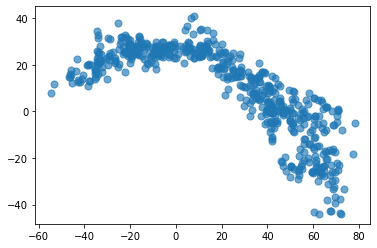

In [81]:
#SCATTER PLOT REAL
    #Temperature vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Temperature"], s=50, alpha=0.65)

## Latitude vs. Humidity Plot

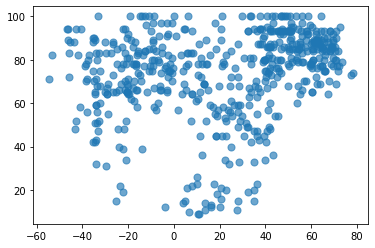

In [83]:
#SCATTER PLOT REAL
    #Humidity vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Humidity"], s=50, alpha=0.65)

## Latitude vs. Cloudiness Plot

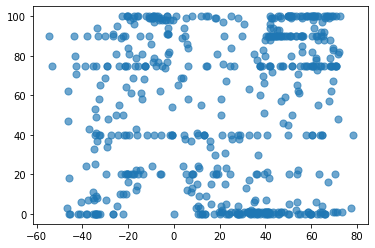

In [84]:
#SCATTER PLOT REAL
    #Cloudiness vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Cloudiness"], s=50, alpha=0.65)

## Latitude vs. Wind Speed Plot

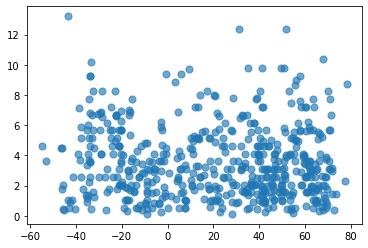

In [85]:
#SCATTER PLOT REAL
    #Wind Speed vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Wind Speed"], s=50, alpha=0.65)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
#df.to_csv('file_name.csv')
#If you want to export without the index, simply add index=False;
#df.to_csv('file_name.csv', index=False)

#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

#print (df)


cityweather.to_csv("CitiesWeather.csv", index=False)
cityweather


,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,hobart,AU,-42.8794,147.3294,2021-01-14 12:05:10,13.42,94.0,75.0,0.51
1,albany,US,42.6001,-73.9662,2021-01-14 12:05:41,-0.62,73.0,99.0,0.95
2,maniitsoq,GL,65.4167,-52.9000,2021-01-14 12:05:42,-7.75,93.0,92.0,3.12
3,sungairaya,ID,0.7000,108.9000,2021-01-14 12:05:42,24.60,91.0,100.0,2.83
4,laramie,US,41.3114,-105.5911,2021-01-14 12:05:43,-8.79,57.0,1.0,7.20
...,...,...,...,...,...,...,...,...,...
544,levin,NZ,-40.6333,175.2750,2021-01-14 12:11:51,15.53,94.0,6.0,0.45
545,shirokiy,RU,49.7580,129.5230,2021-01-14 12:11:52,-28.26,86.0,0.0,1.29
546,bilibino,RU,68.0546,166.4372,2021-01-14 12:11:53,-29.81,84.0,88.0,0.39
547,kaduqli,SD,11.0167,29.7167,2021-01-14 12:11:53,35.43,9.0,9.0,2.83


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
cityweathernew = 

In [72]:
#  Get the indices of cities that have humidity over 100%.


In [73]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Linear Regression

In [74]:
#create 2 data frames with lat <0 and lat >0

citynorth = coordsunique.loc[coordsunique["Latitude"] > 0, :]
citynorth

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,23.65,-27.07,ponta do sol,PT,2021-01-13 10:32:01,11.20,63.0,75.0,3.09
1,32.64,-56.34,saint george,US,2021-01-13 10:28:20,0.00,37.0,1.0,0.72
2,85.35,155.08,chokurdakh,RU,2021-01-13 10:31:44,-39.34,83.0,31.0,0.52
4,33.34,-172.68,kapaa,US,2021-01-13 10:31:48,22.00,83.0,1.0,3.09
5,63.24,-143.89,fairbanks,US,2021-01-13 10:30:03,-19.37,84.0,75.0,1.03
...,...,...,...,...,...,...,...,...,...
572,36.98,4.41,timizart,DZ,2021-01-13 10:38:41,10.45,70.0,96.0,3.27
573,46.46,117.75,manzhouli,CN,2021-01-13 10:38:42,-24.62,84.0,3.0,4.32
576,30.23,116.01,huangmei,CN,2021-01-13 10:38:43,9.45,51.0,0.0,0.74
577,47.69,133.67,lermontovka,RU,2021-01-13 10:38:45,-12.83,95.0,100.0,1.39


In [75]:
#create 2 data frames with lat <0 and lat >0

citysouth = coordsunique.loc[coordsunique["Latitude"] < 0, :]
citysouth

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
3,-29.18,60.31,saint-philippe,RE,2021-01-13 10:31:47,28.20,70.0,90.0,3.09
9,-43.45,-53.41,mar del plata,AR,2021-01-13 10:30:45,14.68,77.0,0.0,4.12
14,-33.99,-122.31,rikitea,PF,2021-01-13 10:31:54,25.19,80.0,0.0,7.26
15,-44.33,115.95,albany,US,2021-01-13 10:30:02,-3.12,75.0,0.0,0.77
16,-39.54,-163.40,avarua,CK,2021-01-13 10:31:55,27.00,78.0,75.0,6.69
...,...,...,...,...,...,...,...,...,...
580,-12.91,-33.13,coruripe,BR,2021-01-13 10:38:47,26.92,71.0,100.0,5.02
581,-40.89,167.50,hokitika,NZ,2021-01-13 10:38:47,14.66,89.0,84.0,2.26
582,-21.54,-95.56,hualmay,PE,2021-01-13 10:38:48,20.97,87.0,97.0,3.22
583,-30.89,-72.74,ovalle,CL,2021-01-13 10:38:49,16.48,52.0,0.0,0.37


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

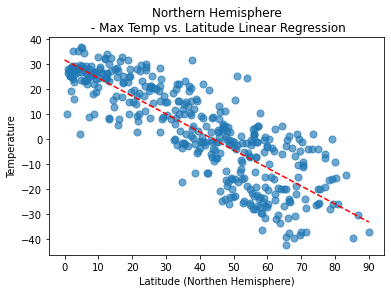

In [76]:
#Scatterplot with linear regression model


northtemp_slope, northtemp_int, northtemp_r, northtemp_p, northtemp_std_err = st.linregress(citynorth["Latitude"], citynorth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northtemp_fit = northtemp_slope * xlatnorth + northtemp_int


plt.scatter(citynorth["Latitude"], citynorth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northtemp_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Temperature')
plt.show()


In [77]:
northtemp_fit

array([ 31.54156368,  24.35478047,  17.16799727,   9.98121406,
         2.79443086,  -4.39235235, -11.57913555, -18.76591876,
       -25.95270197, -33.13948517])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

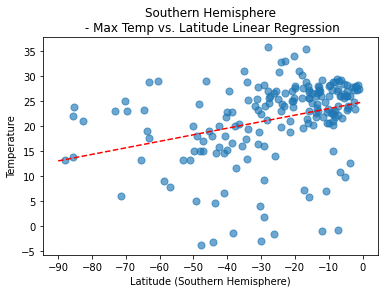

In [78]:
#Scatterplot with linear regression model


southtemp_slope, southtemp_int, southtemp_r, southtemp_p, southtemp_std_err = st.linregress(citysouth["Latitude"], citysouth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southtemp_fit = southtemp_slope * xlatsouth + southtemp_int


plt.scatter(citysouth["Latitude"], citysouth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southtemp_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Temperature')
plt.show()

In [79]:
xlatsouth

array([-90, -80, -70, -60, -50, -40, -30, -20, -10,   0])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

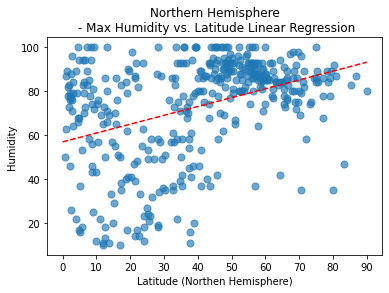

In [80]:
#Scatterplot with linear regression model


northhum_slope, northhum_int, northhum_r, northhum_p, northhum_std_err = st.linregress(citynorth["Latitude"], citynorth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
northhum_fit = northhum_slope * xlatnorth + northhum_int

xlatnorth = np.arange(0, 90+1, 10)
plt.scatter(citynorth["Latitude"], citynorth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northhum_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

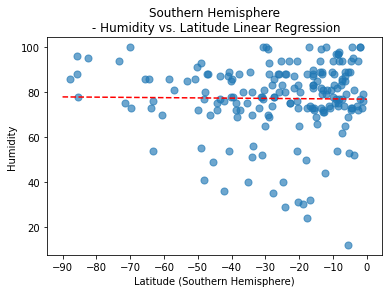

In [81]:
#Scatterplot with linear regression model


southhum_slope, southhum_int, southhum_r, southhum_p, southhum_std_err = st.linregress(citysouth["Latitude"], citysouth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southhum_fit = southhum_slope * xlatsouth + southhum_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southhum_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

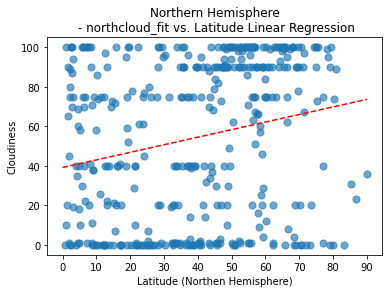

In [82]:
#Scatterplot with linear regression model


northcloud_slope, northcloud_int, northcloud_r, northcloud_p, northcloud_std_err = st.linregress(citynorth["Latitude"], citynorth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northcloud_fit = northcloud_slope * xlatnorth + northcloud_int

plt.scatter(citynorth["Latitude"], citynorth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northcloud_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - northcloud_fit vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

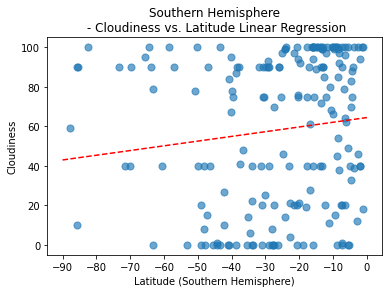

In [83]:
#Scatterplot with linear regression model

southcloud_slope, southcloud_int, southcloud_r, southcloud_p, southcloud_std_err = st.linregress(citysouth["Latitude"], citysouth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southcloud_fit = southcloud_slope * xlatsouth + southcloud_int


plt.scatter(citysouth["Latitude"], citysouth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southcloud_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

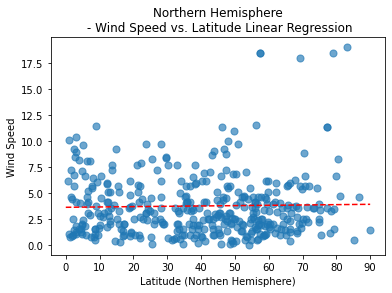

In [84]:
#Scatterplot with linear regression model


northwind_slope, northwind_int, northwind_r, northwind_p, northwind_std_err = st.linregress(citynorth["Latitude"], citynorth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northwind_fit = northwind_slope * xlatnorth + northwind_int


plt.scatter(citynorth["Latitude"], citynorth["Wind Speed"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northwind_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

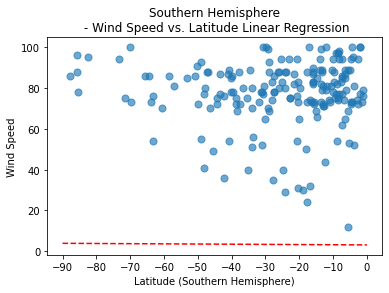

In [85]:
#Scatterplot with linear regression model


southwind_slope, southwind_int, southwind_r, southwind_p, southwind_std_err = st.linregress(citysouth["Latitude"], citysouth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southwind_fit = southwind_slope * xlatsouth + southwind_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southwind_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Wind Speed')
plt.show()